In [3]:
"""Create parameters.py and load it"""

# Directory for .inp file:
path = 'D:/parameter_studies/Bubble_dynamics_simulation/INP file examples/chemkin_AR_HE.inp'

# import libraries:
import importlib   # For reloading your own files
import numpy as np
# my own files:
import Bubble_dynamics_simulation.inp_data_extractor as inp   # numeric constants and coefficents
importlib.reload(inp)   # reload changes you made
inp.extract(path)

import parameters as par   # numeric constants and coefficents
importlib.reload(par)   # reload changes you made
print(par.model)

path=D:/parameter_studies/Bubble_dynamics_simulation/INP file examples/chemkin_AR_HE.inp
Note, lambda value for specie 'H' is not in data.py: 0.0 is used
Note, lambda value for specie 'O' is not in data.py: 0.0 is used
Note, lambda value for specie 'OH' is not in data.py: 0.0 is used
Note, lambda value for specie 'HO2' is not in data.py: 0.0 is used
Note, lambda value for specie 'OHEX' is not in data.py: 0.0 is used
Warning, third body 'CO' is not in species in line 65 ('H2/2.5/ O2/1/ H2O/12/ CO/1.9/ CO2/3.8/ HE/0.83/ AR/1/') in reaction '2H+M=H2+M'
Warning, third body 'CO2' is not in species in line 65 ('H2/2.5/ O2/1/ H2O/12/ CO/1.9/ CO2/3.8/ HE/0.83/ AR/1/') in reaction '2H+M=H2+M'
Warning, third body 'CO' is not in species in line 67 ('H2/2.5/ H2O/12/ AR/0.83/ CO/1.9/ CO2/3.8/ HE/0.83/') in reaction '2O+M=O2+M'
Warning, third body 'CO2' is not in species in line 67 ('H2/2.5/ H2O/12/ AR/0.83/ CO/1.9/ CO2/3.8/ HE/0.83/') in reaction '2O+M=O2+M'
Warning, third body 'CO' is not in speci

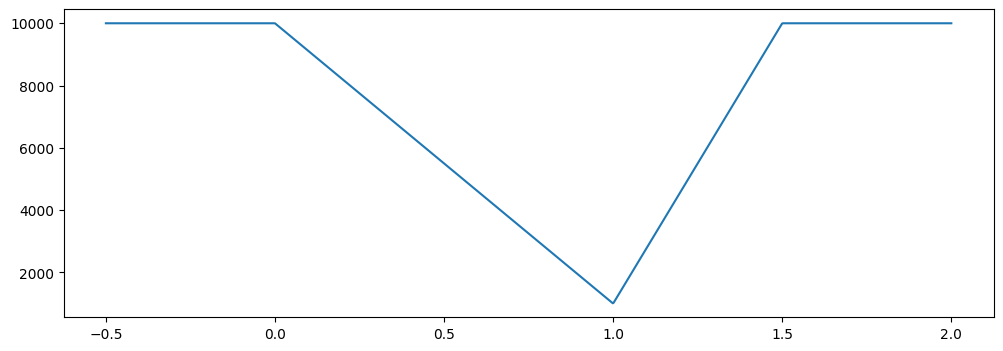

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from numba import njit   # Just In Time compiler
from numba.types import float64   # JIT types

@njit(float64(float64, float64, float64[:]))
def Excitation(t, P_amb, args):
    decay_time, increase_time, min_pressure, radius = args
    if t < 0.0:
        p_Inf = P_amb
    elif t > decay_time+increase_time:
        p_Inf = P_amb
    elif t < decay_time:
        p_Inf = P_amb - (P_amb-min_pressure) / decay_time * t
    else:
        p_Inf = min_pressure + (P_amb-min_pressure) / (increase_time) * (t-decay_time)
    return p_Inf#np.array([p_Inf, p_Inf_dot], dtype=np.float64)

def circle(t, args):
    radius, center_x, center_y = args
    return np.sqrt(radius**2 - (t-center_x)**2) + center_y

t = np.linspace(-0.5, 2.0, 1000)
args = np.array([1.0, 0.5, 1000, 0.1], dtype=np.float64); P_amb = 10000
p = [Excitation(time, P_amb, args) for time in t]
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(axisbelow=True)
ax.plot(t, p)


In [16]:
"""Import simulation"""

import numpy as np
import importlib
import matplotlib.pyplot as plt
from termcolor import colored

already_imported = 'de' in globals()
try:
    import full_bubble_model as de
except:
    try:
        import Bubble_dynamics_simulation.full_bubble_model as de
    except:
        print(colored(f'Error, \'full_bubble_model.py\' not found', 'red'))
if already_imported: importlib.reload(de)   # reload changes you made

model: chemkin_AR_HE
target specie: H2
excitation: no_excitation (control parameters: [])
enable heat transfer: True	enable evaporation: True	enable reactions: True	enable dissipated energy: False


In [14]:
"""Control parameters"""

cpar = de.dotdict(dict(
    ID = 0,                           # ID of control parameter (not used during calculation)
  # Initial conditions:
    R_E = 1.0e-6,                    # bubble equilibrium radius [m]
    ratio = 5.0,                      # initial radius / equilibrium radius R_0/R_E [-]
    gases=[par.index['AR']],          # indexes of species in initial bubble (list of species indexes)
    fractions=[1.0],                  # molar fractions of species in initial bubble (list of fractions for every gas)
  # Ambient parameters:
    P_amb = 25.0 * par.bar2Pa,         # ambient pressure [Pa]
    T_inf = 30.0 + par.absolute_zero, # ambient temperature [K]
  # Liquid parameters:
    alfa_M = 0.05,              # water accommodation coefficient [-]
    P_v = par.P_v,                    # vapour pressure [Pa]
    mu_L = par.mu_L,                  # dynamic viscosity [Pa*s]
    c_L = par.c_L,                    # sound speed [m/s]
    surfactant = 1.0,                 # surfactant (surface tension modfier) [-]
  # Excitation parameters: (excitation_type = sin_impulse_flat_ends)
    p_A = 0.0,                        # [Pa]
    freq = 20e3,                       # [Hz]
    n = 1.0,                          # [-]
))

# Calculate pressure/temperature dependent parameters:
cpar.mu_L = de.Viscosity(cpar.T_inf)
cpar.P_v = de.VapourPressure(cpar.T_inf)

"""# Equilibrium state
p_E = cpar.P_amb + 2.0 * cpar.surfactant * par.sigma / cpar.R_E # [Pa]
V_E = 4.0 / 3.0 * cpar.R_E**3 * np.pi # [m^3]
p_gas = p_E - cpar.P_v  # [Pa]
n_gas = p_gas * V_E / (par.R_g * cpar.T_inf) # [mol]

# Expansion
R_0 = cpar.R_E * 4.5
V_0 = 4.0 / 3.0 * R_0**3 * np.pi    # [m^3]
n_H2O = cpar.P_v * V_0 / (par.R_g * cpar.T_inf) # [mol]
c_H2O = n_H2O / V_0    # [mol/m^3]
c_gas = n_gas / V_0    # [mol/m^3]
p_gas = c_gas * par.R_g * cpar.T_inf # [Pa]
cpar.min_pressure = cpar.P_amb#cpar.P_v + p_gas - 2.0 * cpar.surfactant * par.sigma / R_0"""
None

succecfully solved with LSODA solver


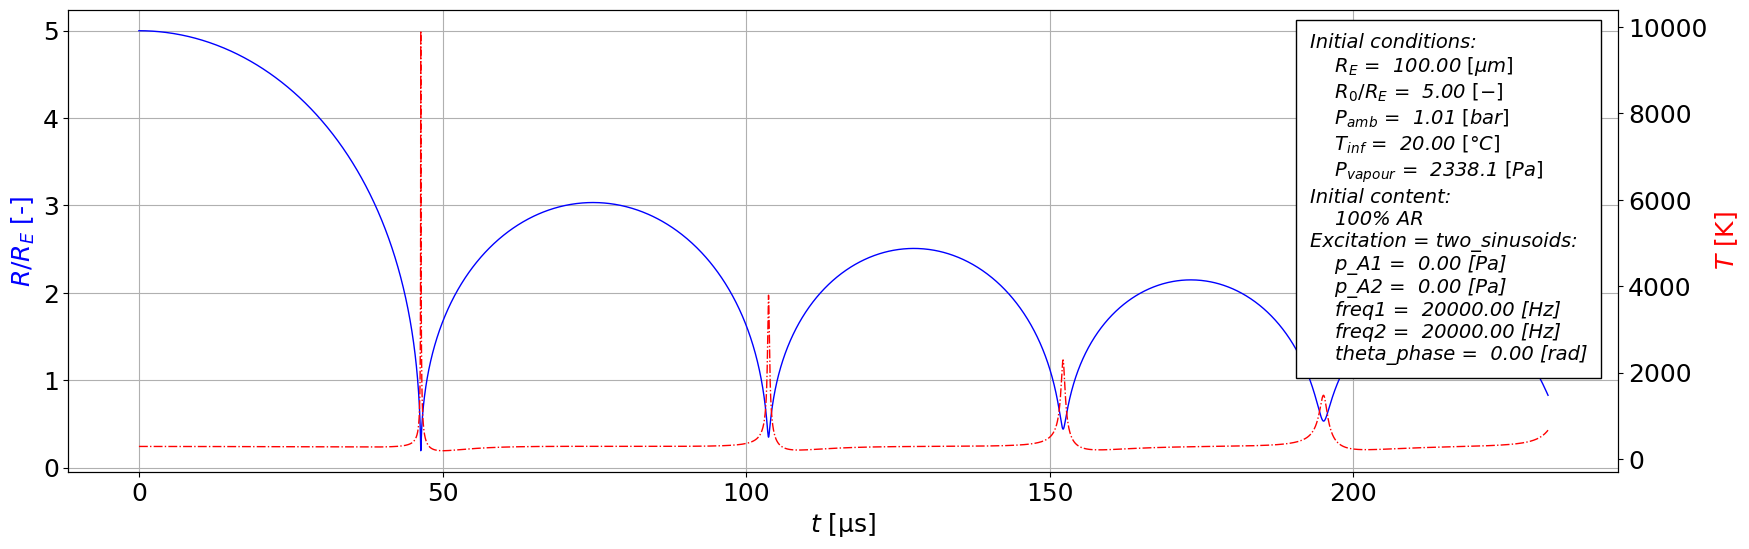

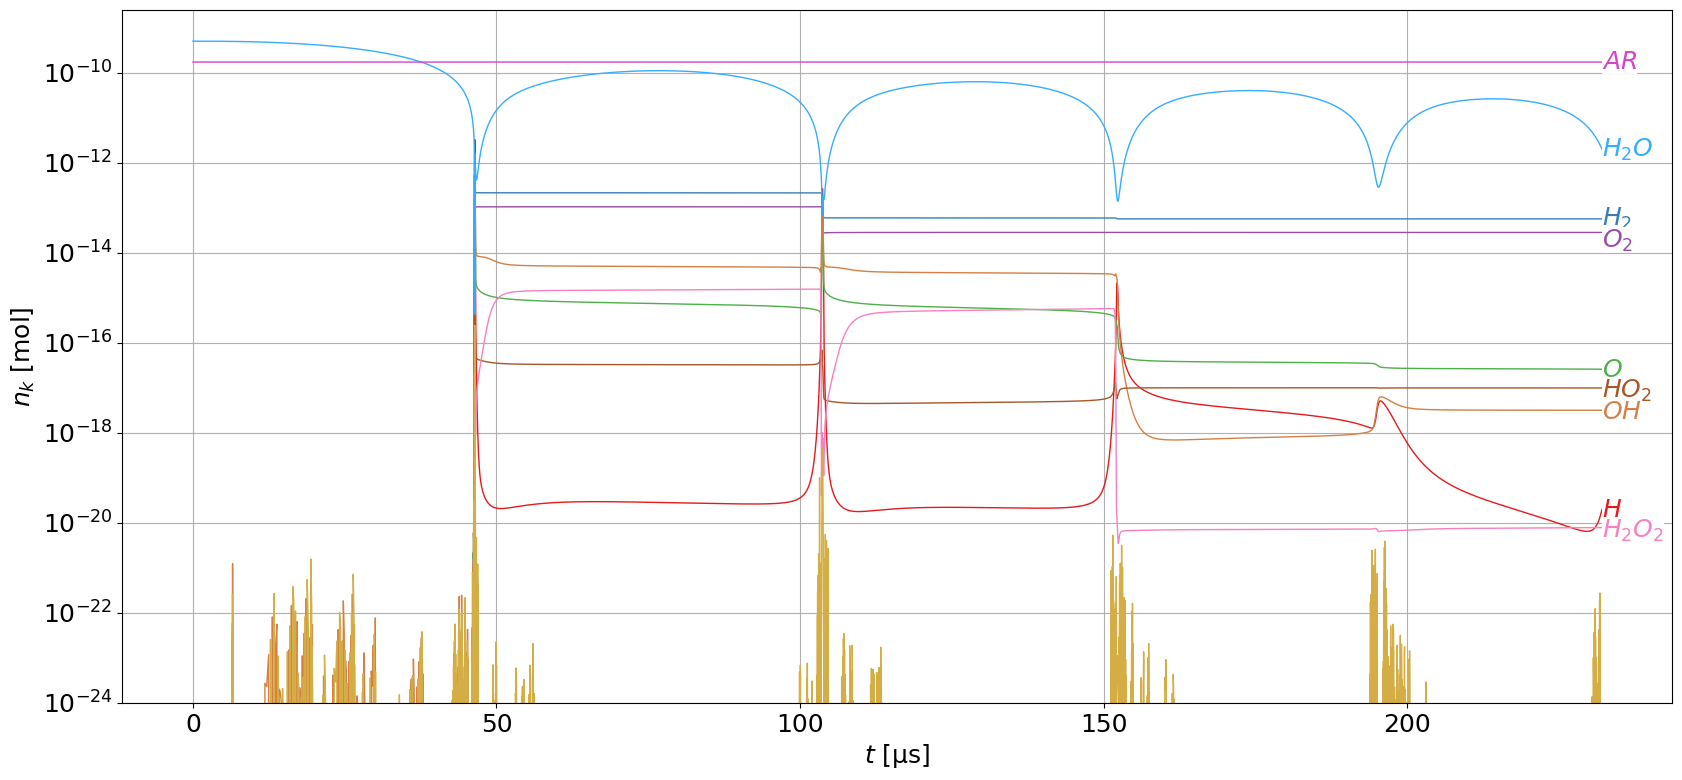

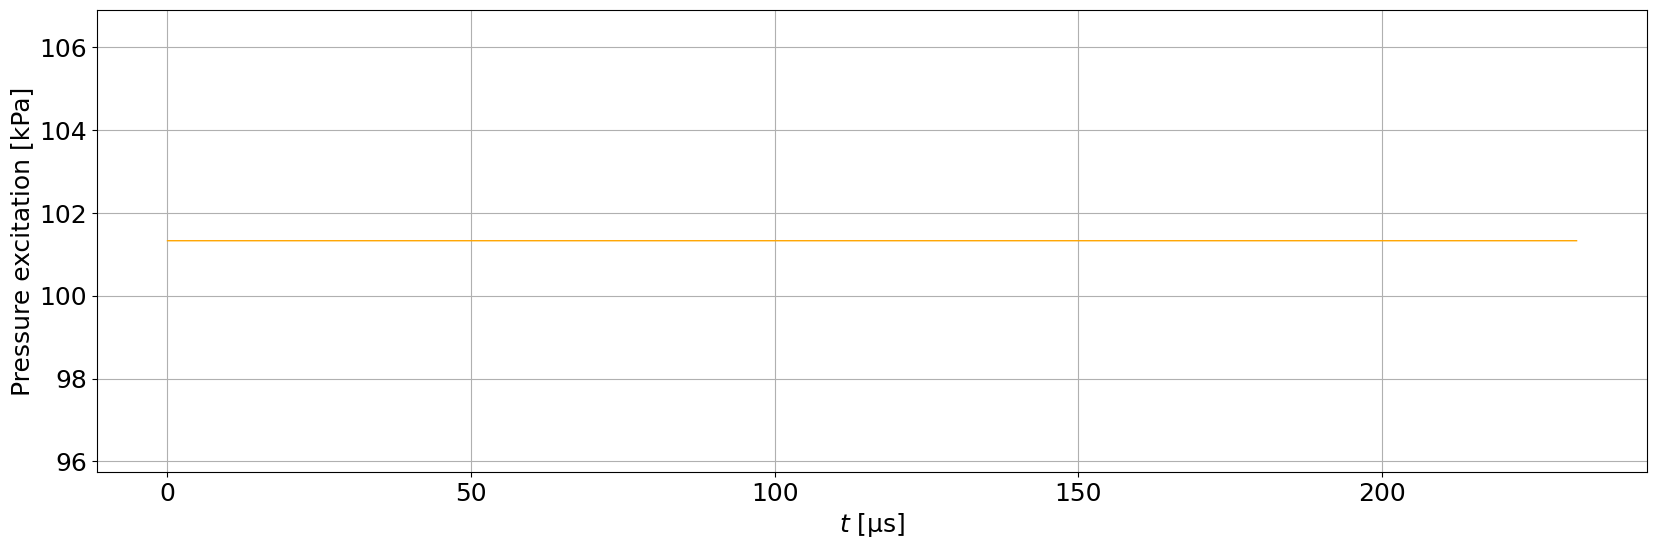

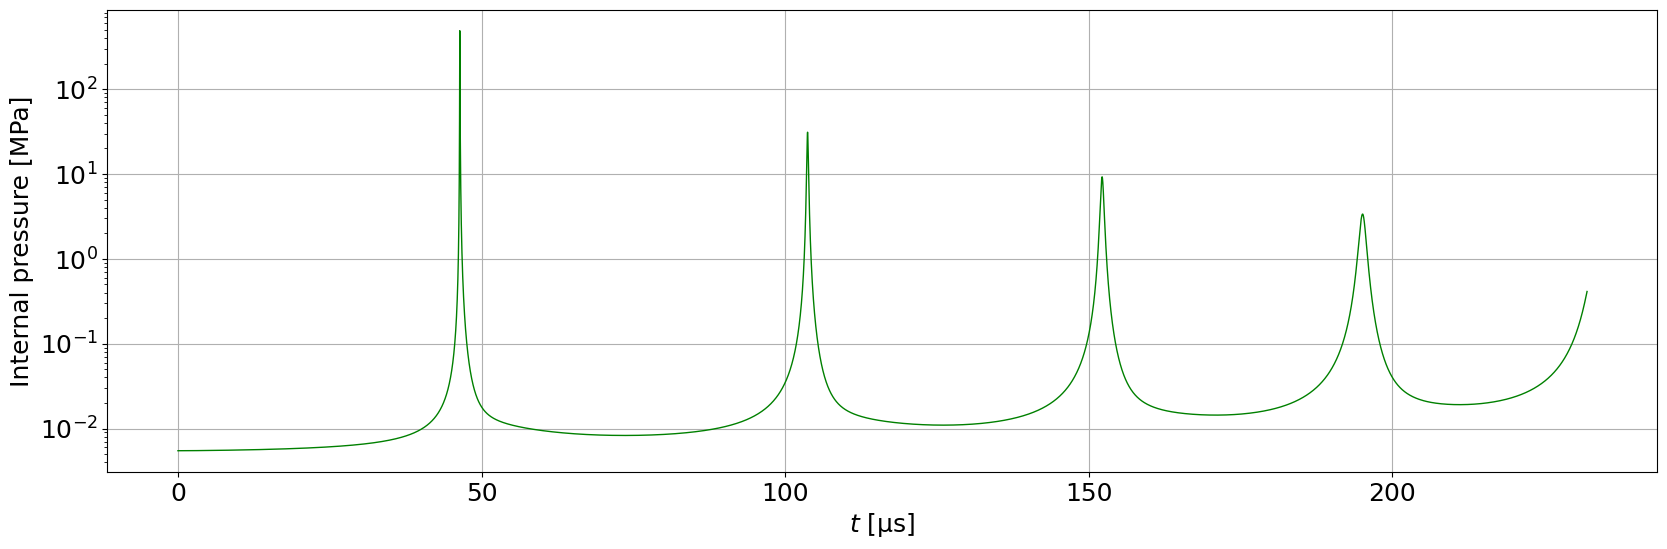

Control parameters:
    ID = 0
    R_E = 100.00 [um]
    ratio = 5.00 [-]
    P_amb = 1.01 [bar]
    alfa_M = 0.35 [-]
    T_inf = 20.00 [°C]
    P_v = 2338.10 [Pa]
    mu_L = 1.00 [mPa*s]
    surfactant = 1.00 [-]    
    excitation = 'two_sinusoids'
    (p_A1 = 0.00 [Pa]; p_A2 = 0.00 [Pa]; freq1 = 20000.00 [Hz]; freq2 = 20000.00 [Hz]; theta_phase = 0.00 [rad])
    Initial content: 100% AR
Simulation info:
    error_code = 0
    elapsed_time = 1.12 [s]
    steps = 14002 [-]
Final state:
    R_final = 100.02 [um];   R_dot_final =3.7027834892494164e-13 [m/s];   T_final = 293.15 [K]
    n_H2_final = 5.65e-14 [mol]
    Final molar concentrations: [mol/cm^3]
        H     :  -4.6658791382782077e-17;    H2    :    1.347855466309345e-08;    O     :  -1.0060098688462466e-14;    O2    :    6.739665789237246e-09;    
        OH    :  -1.0931535710840437e-14;    H2O   :    9.592661841215423e-07;    N2    :  -1.9980500578413065e-28;    HO2   :   -8.881550463083136e-13;    
        H2O2  :     5.7

In [8]:
"""Plotting"""
#importlib.reload(de)   # reload changes you made
de.plot(cpar, presentation_mode=False, plot_pressure=True, LSODA_timeout=100, Radau_timeout=100)